# 0. Imports

In [68]:
from sklearn import datasets as ds
from sklearn import model_selection as ms
from sklearn import ensemble as en
from sklearn import metrics as mt
from matplotlib import pyplot as plt
import numpy as np
from sklearn.metrics import precision_recall_curve, f1_score, auc, roc_curve, roc_auc_score, accuracy_score


# 1.0 Load Dataset

In [45]:
# generate 2 class dataset
X, y = ds.make_classification(n_samples=1000, n_classes=2, random_state=1)

In [51]:
# split into train/test sets
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.5, random_state=2)

# 2.0 Model Training

In [55]:
# definition
model = en.RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)

# train fit
model.fit(X_train, y_train)

# performance
yhat_test = model.predict_proba(X_test)[:, 1]

# 3.0 ROC Curve

In [53]:
fpr, tpr, th = mt.roc_curve(y_test, yhat_test)

# Calculate AUC score
auc_score = mt.roc_auc_score(y_test, yhat_test)

Text(0, 0.5, 'True Positive Rate')

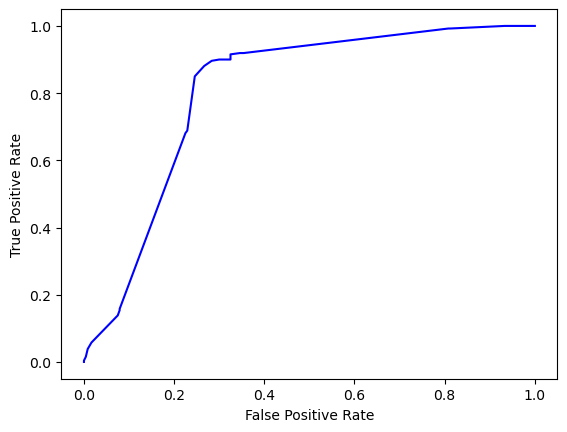

In [59]:
plt.plot(fpr, tpr, color='b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [63]:
# Find the best threshold based on ROC curve
distances = np.sqrt((1 - tpr)**2 + fpr**2)
best_threshold = th[np.argmin(distances)]
print(f"Best Threshold: {best_threshold}")

Best Threshold: 0.5368881118881119


In [70]:
# Calculate accuracy using the best threshold
y_pred = (yhat_test >= best_threshold).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.834


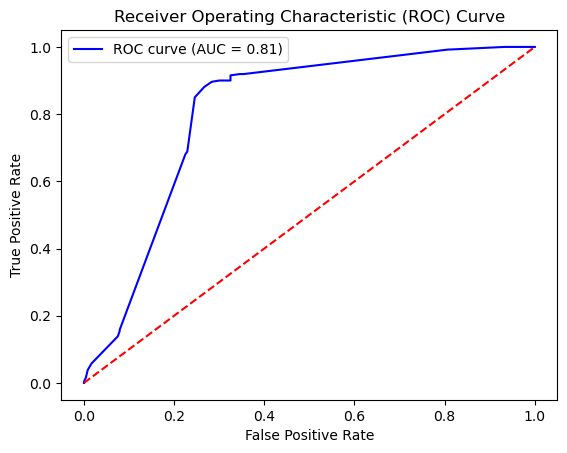

In [56]:
plt.plot( fpr, tpr, color='b', label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()